# Haar Feature Based Cascade Classifier

Machine learning method where a cascade function is trained on a large amount of positive and negative images. <br>
Positive meaning it includes the desired object and negative images lack it, which in turn can be used for object detection.

## Haar Features

**Black and white boxes below which act as convolutional kernels.** <br> The features are more specifically single values received by subtracting the sum of pixels under the white rectangles from the sum of pixels under the black rectangles. 

<img src="haar_features.png">

Next steps:
* Feature selection happens. 
* Try the different Haar features and see which of those produce the largest value for the difference between the sums of pixels between the black and white rectangles. 

<img src="haar_face.png">
These are known as Haar Like Features.

Reason for the choice of shown optimal Haar features in the above example: The eyes are usually a bit darker whereas the area below likely is lighter, and thus a horizontal rectangle with black up top and white below is suitable. Secondly, the bridge of the nose is often lighter than the eyes and as such a Haar feature with a vertical white box in the middle is the way to go.

### Use of Adaboost algorithm
Lots of these Haar-like features can be applied to an image and using the Adaboost algorithm which finds an optimal threshold for classifying the training images correctly. <br>
Placing one of these set of classifiers somewhere, even on the best possible position, will result in some error still since all images within the positive and negative sets differ from each other. <br>
To tackle this, the Haar features with the smallest error rates are chosen as classifiers.

## Casscade Classifier

In an image, most of the image region do not belong to ROI. So it is a better idea to have a simple method to check if a window is a candidate for ROI or not. <br>
If it is not, discard it in a single shot. Don’t process it again. Instead focus on region where there can be a face. This way, we can find more time to check a possible face region, while decreasing the total required computation applied on non ROI.

**Concept of Cascade of Classifiers:** Instead of applying all the features on a window, group the features into different stages of classifiers and apply one-by-one. (First few stages will contain very less number of features). If a window fails the first stage, discard it. We don’t consider remaining features on it. If it passes, apply the second stage of features and continue the process. The window which passes all stages is the required output.

Reference: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_objdetect/py_face_detection/py_face_detection.html
<br>
List of HaarClassifiers: https://github.com/opencv/opencv/tree/master/data/haarcascades

# Face Detection using Haar Cascade Classifier

In [38]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [39]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [58]:
img = cv2.imread('people.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, 1.04, 6)
print(faces)
for(x, y, w, h) in faces:
    img = cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 3)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]

[[869  27  41  41]
 [649  69  64  64]
 [465 120 117 117]
 [848 122  73  73]
 [568 186 121 121]
 [323 257 119 119]
 [181 385 107 107]
 [726 396 119 119]
 [629 380 112 112]
 [617 426 116 116]]


The method can take a few parameters which can be tweaked to finetune the results:
* scaleFactor: Parameter specifying how much the image size is reduced at each image scale. Increasing it leads to faster detection with the risk of missing some objects, whereas a small value might sometimes be too thorough.
* minNeighbors: Parameter specifying how many neighbors each candidate rectangle should have to retain it. Higher value results in less detection but with higher quality.
* minSize: Minimum possible object size. Objects smaller than that are ignored.
* maxSize: Maximum possible object size. Objects larger than that are ignored.

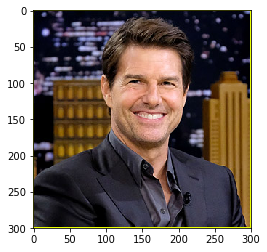

In [59]:
plt.imshow(cv2.cvtColor(cv2.imread('tom.jpg'), cv2.COLOR_BGR2RGB))
plt.show()

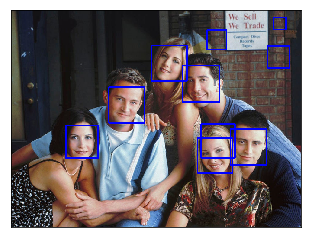

In [60]:
plt.xticks([])
plt.yticks([])
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()